In [1]:
import numpy as np
import pandas as pd
import NelsonSiegelFunctions as nsf

import pylab
import matplotlib.pyplot as plt
from scipy.optimize import fmin, minimize
from scipy.stats import skew, kurtosis

In [2]:
df = pd.read_csv("2016 2018 BPAM Yield Matrix.csv", index_col = 0)
df.index = pd.to_datetime(df.index)
df.columns = pd.to_numeric(df.columns.values)
df.head()

,3,6,12,24,36,60,84,120,180,240,300,360
2016-01-04,2.475,2.509,2.587,2.913,3.280,3.532,4.222,4.262,4.754,4.834,4.997,5.198
2016-01-05,2.469,2.503,2.580,2.916,3.295,3.512,4.180,4.275,4.765,4.846,5.010,5.214
2016-01-06,2.482,2.516,2.594,2.945,3.340,3.577,4.192,4.299,4.753,4.797,4.914,5.061
2016-01-07,2.543,2.577,2.656,2.986,3.357,3.592,4.189,4.304,4.758,4.801,4.919,5.068
2016-01-08,2.601,2.636,2.715,2.998,3.314,3.572,4.185,4.298,4.770,4.832,4.973,5.149


In [3]:
df= df[df.index > np.datetime64("2016-01-01")]

In [4]:
def getMonthlyData(df):
    dic = {}
    m = df.index[0].month
    for index, row in df.iterrows():
        if index.month == m:
            dic[index]=row
            m = (m%12)+1
    return pd.DataFrame.from_dict(dic).transpose()

In [5]:
def getWeeklyData(df):
    return (df.resample('W-Mon').last())

In [6]:
df_monthly = getMonthlyData(df)
df_monthly.tail()

,3,6,12,24,36,60,84,120,180,240,300,360
2018-06-01,3.226,3.278,3.411,3.529,3.666,3.818,4.089,4.240,4.735,5.185,5.144,5.140
2018-07-02,3.234,3.286,3.414,3.500,3.584,3.907,4.128,4.253,4.773,5.152,5.108,5.101
2018-08-01,3.210,3.262,3.390,3.449,3.502,3.813,4.012,4.093,4.647,4.991,5.079,5.238
2018-09-03,3.193,3.245,3.372,3.433,3.491,3.804,3.999,4.112,4.646,4.953,5.077,5.279
2018-10-01,3.182,3.234,3.361,3.478,3.606,3.837,4.029,4.133,4.619,4.906,5.050,5.277


In [7]:
df_weekly = getWeeklyData(df)
df_weekly.tail()

,3,6,12,24,36,60,84,120,180,240,300,360
2018-09-10,3.223,3.275,3.403,3.497,3.596,3.895,4.119,4.215,4.738,5.006,5.083,5.227
2018-09-17,3.223,3.275,3.403,3.495,3.592,3.865,4.060,4.170,4.666,4.969,5.084,5.275
2018-09-24,3.181,3.233,3.360,3.469,3.587,3.827,4.042,4.146,4.653,4.929,5.060,5.269
2018-10-01,3.182,3.234,3.361,3.478,3.606,3.837,4.029,4.133,4.619,4.906,5.050,5.277
2018-10-08,3.196,3.249,3.376,3.479,3.590,3.845,4.050,4.161,4.667,4.948,5.085,5.297


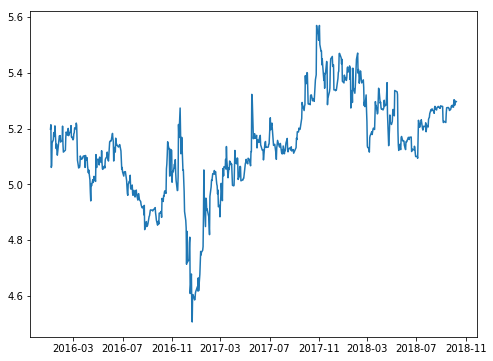

In [8]:
i = 360
plt.figure(figsize=(8,6))
plt.plot(df[i])

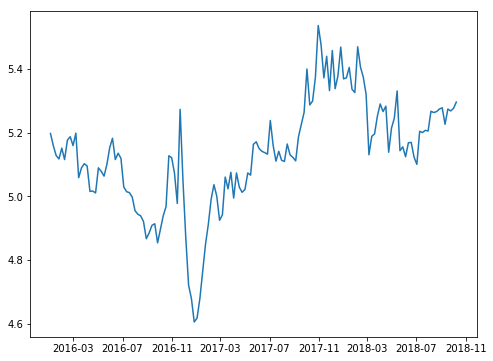

In [9]:
plt.figure(figsize=(8,6))
plt.plot(df_weekly[i])

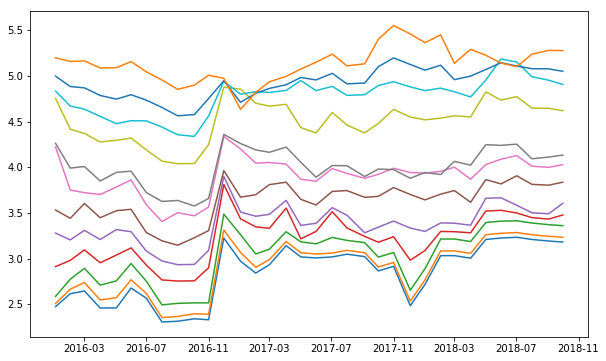

In [10]:
plt.figure(figsize=(10,6))
plt.plot(df_monthly)

In [11]:
daily_params = nsf.getNSSParams(df)

In [12]:
weekly_params = nsf.getNSSParams(df_weekly)

In [13]:
monthly_params = nsf.getNSSParams(df_monthly)

In [14]:
daily_pred = nsf.getPred(df,daily_params)
weekly_pred = nsf.getPred(df,weekly_params)
monthly_pred = nsf.getPred(df,monthly_params)

In [15]:
nsf.getPredMatError(df,daily_pred)

{3: 0.021983845793949616,
 6: 0.01123505363158708,
 12: 0.034662846716652915,
 24: 0.027263809711365092,
 36: 0.041835325941612225,
 60: 0.055369263794700835,
 84: 0.0695455654693131,
 120: 0.10645596717429817,
 180: 0.07091603007414804,
 240: 0.071454056986487,
 300: 0.036706251050048704,
 360: 0.050445307733451517}

In [16]:
nsf.getPredMatError(df_weekly,weekly_pred)

{3: 0.022262478073674326,
 6: 0.011523092011757191,
 12: 0.034994058411219484,
 24: 0.027706112457623014,
 36: 0.04074123270413369,
 60: 0.05592674731637274,
 84: 0.07000751967675509,
 120: 0.10505823582048887,
 180: 0.07018296681577323,
 240: 0.07028702526487107,
 300: 0.03629078983462976,
 360: 0.04889348163224754}

In [17]:
nsf.getPredMatError(df_monthly, monthly_pred)

{3: 0.02232168116631133,
 6: 0.012316468751479714,
 12: 0.034318933969815654,
 24: 0.030397597408436998,
 36: 0.03765289179671282,
 60: 0.056777671947426805,
 84: 0.0769037410071084,
 120: 0.10710319671181988,
 180: 0.07339239023637632,
 240: 0.06872076002731003,
 300: 0.03742388576853579,
 360: 0.048998067108032714}

In [18]:
monthly_params

,2016-01-04 00:00:00,2016-02-02 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-03 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-04 00:00:00,...,2018-01-02 00:00:00,2018-02-02 00:00:00,2018-03-01 00:00:00,2018-04-02 00:00:00,2018-05-02 00:00:00,2018-06-01 00:00:00,2018-07-02 00:00:00,2018-08-01 00:00:00,2018-09-03 00:00:00,2018-10-01 00:00:00
0,5.563469,16.980003,6.722081,6.673012,13.588862,15.796986,7.355534,6.280077,6.636807,6.926992,...,7.104181,7.249656,5.950640,17.180941,5.739361,5.765594,5.657980,5.968625,6.064935,6.146934
1,-3.025835,-14.421960,-4.147679,-4.313264,-11.224976,-13.155217,-4.855008,-4.095640,-4.401430,-4.678968,...,-4.488207,-4.263836,-2.950226,-14.186096,-2.632742,-2.650020,-2.485096,-2.796795,-2.902140,-3.028699
2,0.000004,-34.458863,-9.350568,-6.513077,-4.465286,-34.594833,-0.019786,-6.564787,-6.337439,-7.538545,...,-12.393505,-8.168795,-2.583703,-33.926072,-71.170181,-75.421736,-51.704900,-56.375092,-4.801049,-5.730118
3,-0.915215,20.398716,7.187802,4.699902,2.711985,20.291902,0.739433,4.287694,4.408681,5.020155,...,9.786516,4.778646,1.216686,20.928328,68.604843,72.696367,49.075455,53.468722,2.347542,3.541113
4,50.116882,265.830159,74.456578,77.449658,463.973688,189.497430,219.716254,62.519062,90.456721,89.619205,...,75.384081,76.431093,65.365278,375.965817,27.200028,25.626844,25.435512,36.562049,47.250455,51.468547
5,7.375141,177.978117,56.493962,49.081633,45.345253,127.413583,30.923023,40.273688,60.761218,58.752843,...,61.982168,55.339600,51.429481,272.443307,26.524986,24.968385,24.755274,35.639460,32.995016,36.647069


In [19]:
weekly_params

,2016-01-04 00:00:00,2016-01-11 00:00:00,2016-01-18 00:00:00,2016-01-25 00:00:00,2016-02-01 00:00:00,2016-02-08 00:00:00,2016-02-15 00:00:00,2016-02-22 00:00:00,2016-02-29 00:00:00,2016-03-07 00:00:00,...,2018-08-06 00:00:00,2018-08-13 00:00:00,2018-08-20 00:00:00,2018-08-27 00:00:00,2018-09-03 00:00:00,2018-09-10 00:00:00,2018-09-17 00:00:00,2018-09-24 00:00:00,2018-10-01 00:00:00,2018-10-08 00:00:00
0,5.563471,5.467534,5.509713,34.624253,14.863682,25.334301,10.795524,7.836585,6.910600,6.888500,...,6.142480,6.135315,6.029533,6.117205,6.054921,5.826568,6.032936,6.046112,6.146948,6.098129
1,-3.025834,-2.882362,-2.939943,-32.009035,-12.280519,-22.792605,-8.271677,-5.312607,-4.289564,-4.438521,...,-2.959101,-2.964133,-2.837361,-2.954757,-2.892033,-2.651962,-2.860054,-2.923073,-3.028711,-2.955587
2,-0.000084,-1.730427,-59.087487,-75.914556,-28.735004,-52.637935,-19.241061,-10.943006,-10.753685,-7.933977,...,-4.590840,-4.923588,-4.773419,-4.126076,-36.761293,-37.072088,-5.353835,-5.015762,-5.730098,-5.379264
3,-0.915225,-0.455350,55.748646,37.240393,18.117841,26.024348,12.991511,8.179048,8.397807,5.907256,...,2.286675,2.676718,2.181237,1.734099,33.924215,34.695616,3.128648,2.870813,3.541097,3.158441
4,50.115557,26.604502,18.359165,434.440952,277.755687,281.077726,164.180478,110.318198,80.942546,79.727792,...,55.567142,54.255069,46.110656,52.923656,41.015291,35.147109,46.389510,48.127062,51.469342,48.619733
5,7.375100,24.598301,17.856561,274.971284,191.640791,171.997201,113.354074,80.302111,63.493918,56.255925,...,41.855901,40.518651,33.444994,38.385689,39.603594,34.096225,33.745229,33.535974,36.647742,35.022717


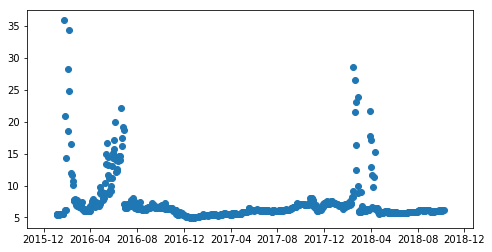

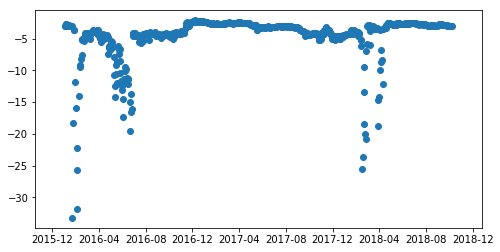

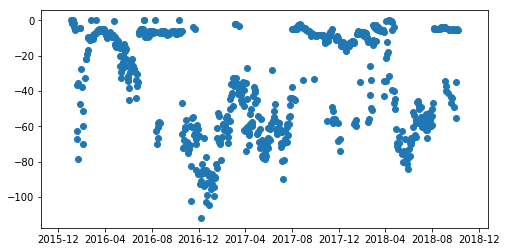

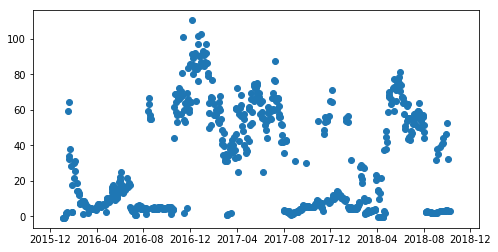

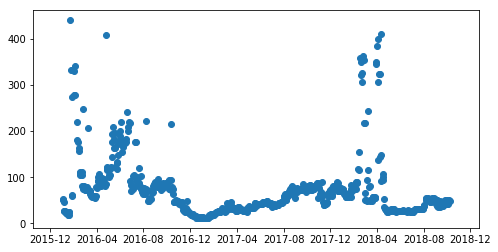

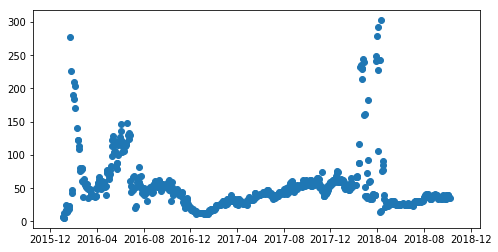

In [20]:
for i in range(0,6):
    plt.figure(figsize = (8,4))
    plt.scatter(daily_params.columns,daily_params.loc[i])
    

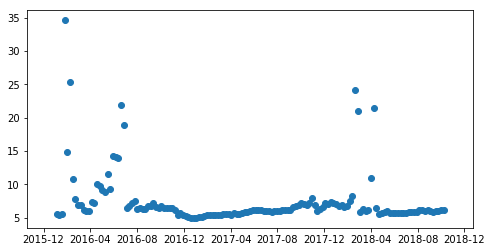

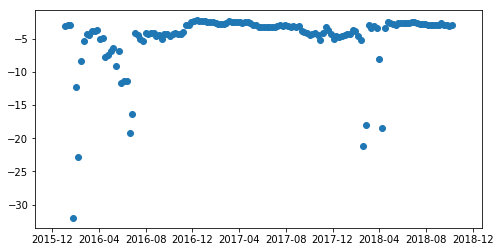

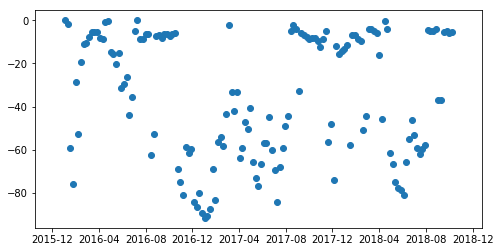

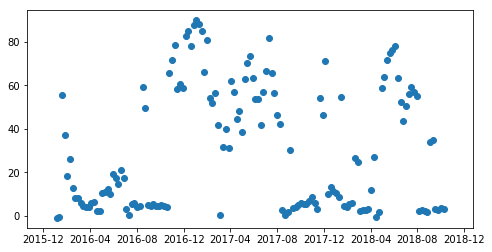

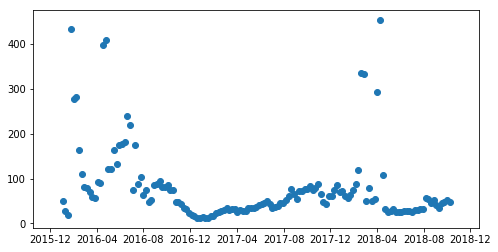

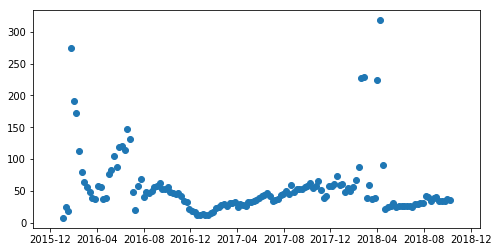

In [21]:
for i in range(0,6):
    plt.figure(figsize = (8,4))
    plt.scatter(weekly_params.columns,weekly_params.loc[i])
    

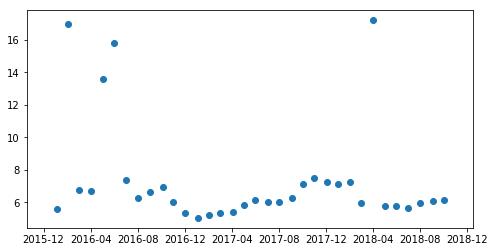

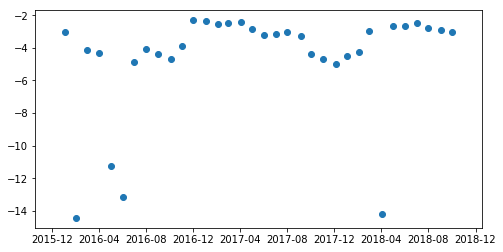

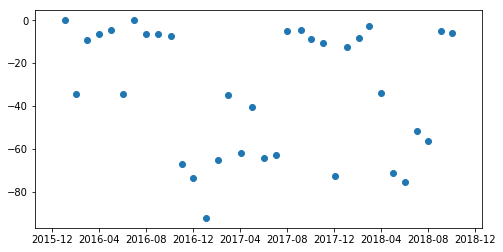

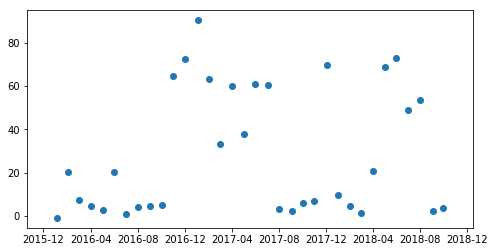

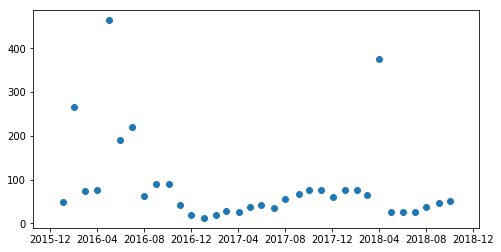

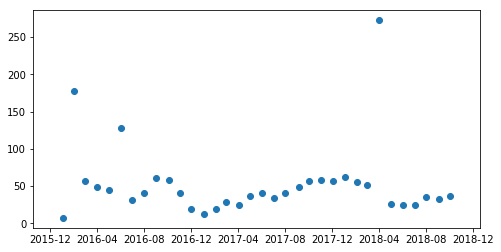

In [22]:
for i in range(0,6):
    plt.figure(figsize = (8,4))
    plt.scatter(monthly_params.columns,monthly_params.loc[i])
    

In [23]:
from sklearn import datasets, linear_model

[array([0.78086347]), 1.5732032426520597, 0.6098636550143812]
[array([0.78828147]), -0.9342239299887778, 0.6213784412660702]
[array([0.88089973]), -4.001170751499423, 0.7764552601638178]
[array([0.89449481]), 3.184771333487408, 0.8004741031615774]
[array([0.78207395]), 15.849811634734593, 0.6116426021545007]
[array([0.79155892]), 11.05797947222382, 0.6275123993792591]


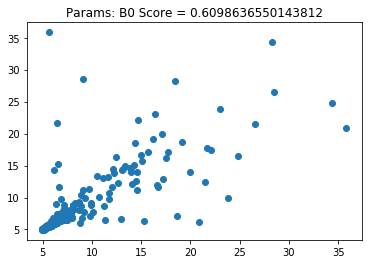

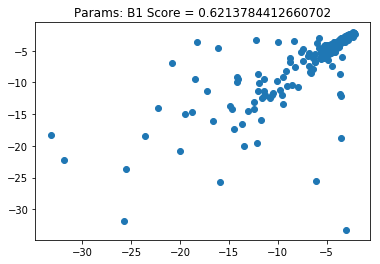

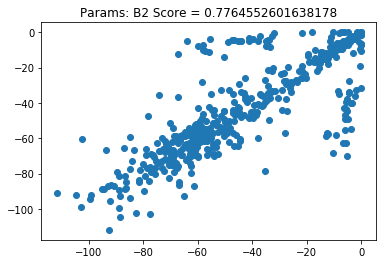

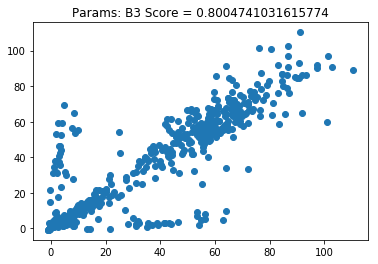

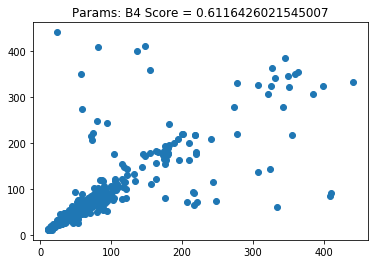

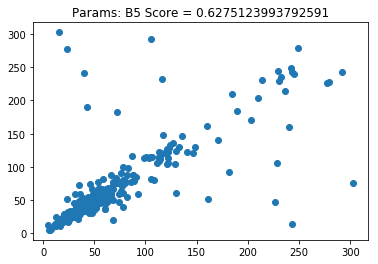

In [24]:
regr = linear_model.LinearRegression()
for i in range(0,6):
    d1=daily_params.loc[i].values[1:-1]
    d0=daily_params.loc[i].values[0:-2]
    

    regr.fit(np.reshape(d0,(d0.size,1)),d1)
    print([regr.coef_,regr.intercept_,regr.score(np.reshape(d0,(d0.size,1)),d1)])

    plt.figure()
    title = "Params: B"+str(i)+" Score = " +str(regr.score(np.reshape(d0,(d0.size,1)),d1))
    plt.title(title)
    plt.scatter(d0,d1)


In [25]:
daily_params

,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,2016-01-14 00:00:00,2016-01-15 00:00:00,...,2018-09-25 00:00:00,2018-09-26 00:00:00,2018-09-27 00:00:00,2018-09-28 00:00:00,2018-10-01 00:00:00,2018-10-02 00:00:00,2018-10-03 00:00:00,2018-10-04 00:00:00,2018-10-05 00:00:00,2018-10-08 00:00:00
0,5.563471,5.617749,5.352966,5.361594,5.495540,5.467531,5.503096,5.488399,5.489144,5.555954,...,6.038221,6.100566,6.089748,6.087149,6.146933,6.117971,6.129840,6.060893,6.125232,6.098116
1,-3.025831,-3.070616,-2.764067,-2.724670,-2.912616,-2.882359,-2.928250,-2.872209,-2.867928,-2.954502,...,-2.904115,-2.965964,-2.959658,-2.971125,-3.028698,-3.000630,-3.004862,-2.926519,-2.982983,-2.955576
2,-0.000003,0.000285,-1.431256,-1.546129,-0.000178,-1.729424,-4.055798,-4.902860,-4.886617,-5.503317,...,-5.093750,-5.256610,-5.703652,-49.040624,-5.730120,-55.194195,-34.991324,-5.221427,-5.360806,-5.379294
3,-0.915230,-0.904798,-0.885077,-0.763889,-0.755290,-0.456315,1.429151,2.106984,2.040158,2.538539,...,2.966062,3.131084,3.388578,46.324939,3.541117,52.434213,32.275642,3.193645,3.192449,3.158459
4,50.116930,53.332225,27.672345,27.578690,46.490030,26.604806,23.179818,21.756742,21.587193,21.739678,...,48.499538,50.861248,47.687565,40.984556,51.468519,40.702843,41.812421,48.818228,50.439481,48.618906
5,7.375077,6.503863,5.490041,5.273501,12.679412,24.600218,17.788063,15.628899,15.434111,14.526043,...,34.968775,36.857385,33.582805,39.632983,36.647075,39.467233,39.827257,35.444518,36.633412,35.021972


In [26]:
d1=daily_params.loc[5].values[1:-1]
d0=daily_params.loc[5].values[0:-2]
regr.fit(np.reshape(d0,(d0.size,1)),d1)
error = regr.predict(np.reshape(d0,(d0.size,1)))-d1

In [27]:
np.average(error), np.std(error), skew(error), kurtosis(error)

(-6.334704925052899e-16,
 25.717082432173477,
 -3.820292318198207,
 53.67913867605099)